## Содержание: 
* #### Честное построение ROC-кривой своими "лапками"
* #### Выбор наилучшего порога для определения метки объекта 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

Возьмём простейший датасет для бинарной классификации - набор пассажиров титаника

In [4]:
df = pd.read_csv('C:/Users/magzu/kaggle/titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Колонка кабин нам не так важна и в будущем мы дропнем ее, а возраст - весомый признак, но мы порешаем с ним по-простому. Не будем акцентироваться на предобработке

<AxesSubplot: xlabel='Age', ylabel='Count'>

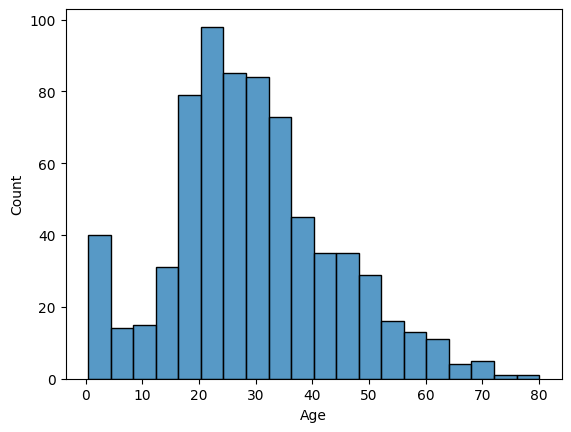

In [8]:
sns.histplot(df.Age)

In [9]:
import statistics

Просто заполним пустые значения возраста самым частым значением

In [10]:
df.fillna(value={'Age' : statistics.mode(df.Age)},inplace=True)

In [11]:
df.drop(columns=['Cabin'], inplace=True)

Проверим, не потеряли ли мы данные по пути

In [12]:
df.shape

(891, 11)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
print(df.columns)
useless_columns = ['Name', 'SibSp', 'Ticket']
df.drop(columns=useless_columns, inplace=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [16]:
df.replace(to_replace='male', value=1, inplace=True)
df.replace(to_replace='female', value=0, inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,1,22.0,0,7.2500,S
1,2,1,1,0,38.0,0,71.2833,C
2,3,1,3,0,26.0,0,7.9250,S
3,4,1,1,0,35.0,0,53.1000,S
4,5,0,3,1,35.0,0,8.0500,S


In [18]:
df.fillna('S', inplace=True)

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Embarked       0
dtype: int64

Ничего не потеряли, можно уверенно шагать дальше

In [20]:
df.shape

(891, 8)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,1,22.0,0,7.2500,S
1,2,1,1,0,38.0,0,71.2833,C
2,3,1,3,0,26.0,0,7.9250,S
3,4,1,1,0,35.0,0,53.1000,S
4,5,0,3,1,35.0,0,8.0500,S


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
lr = LogisticRegression()

In [24]:
y = df.Survived

In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
X = df.drop(columns=['Survived', 'PassengerId'])

In [27]:
X.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,1,22.0,0,7.2500,S
1,1,0,38.0,0,71.2833,C
2,3,0,26.0,0,7.9250,S
3,1,0,35.0,0,53.1000,S
4,3,1,35.0,0,8.0500,S


In [28]:
X.replace(to_replace='S', value=0, inplace=True)
X.replace(to_replace='C', value=1, inplace=True)
X.replace(to_replace='Q', value=2, inplace=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
709,3,1,24.0,1,15.2458,1
439,2,1,31.0,0,10.5000,0
840,3,1,20.0,0,7.9250,0
720,2,0,6.0,1,33.0000,0
39,3,0,14.0,0,11.2417,1


In [31]:
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
lr.score(X_test, y_test)

0.7966101694915254

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(lr, X, y, cv=5);

c:\Users\magzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
scores.mean()

0.7833971502102818

Для построения ROC-кривой потребуются оценки каждого объекта  
Возьмем оценку о принадлежности к 1 классу — выжившему

In [36]:
X_test['y_score'] = lr.predict_proba(X_test)[:, 1]

In [37]:
X_test['y_true'] = y_test

In [38]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,y_score,y_true
709,3,1,24.0,1,15.2458,1,0.122844,1
439,2,1,31.0,0,10.5000,0,0.206590,0
840,3,1,20.0,0,7.9250,0,0.116195,0
720,2,0,6.0,1,33.0000,0,0.813630,1
39,3,0,14.0,0,11.2417,1,0.695982,1


Для начала проверим работспособность предикта при пороге 0.8

In [39]:
X_test['y_pred'] = 1*(X_test['y_score'] > 0.8)

In [40]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,y_score,y_true,y_pred
709,3,1,24.0,1,15.2458,1,0.122844,1,0
439,2,1,31.0,0,10.5000,0,0.206590,0,0
840,3,1,20.0,0,7.9250,0,0.116195,0,0
720,2,0,6.0,1,33.0000,0,0.813630,1,1
39,3,0,14.0,0,11.2417,1,0.695982,1,0


Напишем функцию, возвращающую значения матрицы ошибок (TP, TN, FP, FN) в строковом виде

In [41]:
def get_confusion_matrix_labels(row):
    if row['y_true'] == 1 and row['y_pred'] == 1:
        return 'tp'
    elif row['y_true'] == 0 and row['y_pred'] == 0:
        return 'tn'
    elif row['y_true'] == 1 and row['y_pred'] == 0:
        return 'fp'
    elif row['y_true'] == 0 and row['y_pred'] == 1:
        return 'fn'
    else:
        return np.nan

In [42]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,y_score,y_true,y_pred
709,3,1,24.0,1,15.2458,1,0.122844,1,0
439,2,1,31.0,0,10.5000,0,0.206590,0,0
840,3,1,20.0,0,7.9250,0,0.116195,0,0
720,2,0,6.0,1,33.0000,0,0.813630,1,1
39,3,0,14.0,0,11.2417,1,0.695982,1,0


In [43]:
X_test['cm'] = X_test.apply(get_confusion_matrix_labels, axis=1)

In [44]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,y_score,y_true,y_pred,cm
709,3,1,24.0,1,15.2458,1,0.122844,1,0,fp
439,2,1,31.0,0,10.5000,0,0.206590,0,0,tn
840,3,1,20.0,0,7.9250,0,0.116195,0,0,tn
720,2,0,6.0,1,33.0000,0,0.813630,1,1,tp
39,3,0,14.0,0,11.2417,1,0.695982,1,0,fp


Определим уникальные пороги для нашего датасета  
Пороги между соседними уникальными порогами бесполезны, поскольку они вернут дублирующиеся матрицу ошибок

In [45]:
thresholds = np.sort(np.append(X_test['y_score'].unique(), 0))
np.append(thresholds, 1);

Просто проитрериуемся по порогам и определим матрицу ошибок для каждого

In [46]:
confusion_matrix = []
for thr in thresholds:
    X_test['y_pred'] = (X_test['y_score'] > thr)*1
    TP = len(X_test[(X_test['y_true']==1)&(X_test['y_pred']==1)])
    tn = len(X_test[(X_test['y_true']==0)&(X_test['y_pred']==0)])
    fp = len(X_test[(X_test['y_true']==0)&(X_test['y_pred']==1)])
    fn = len(X_test[(X_test['y_true']==1)&(X_test['y_pred']==0)])
    confusion_matrix.append((TP, tn, fp, fn, thr))

In [47]:
confusion_matrix = pd.DataFrame(confusion_matrix, columns='tp,tn,fp,fn,thr'.split(','))

Определим TPR(True Positive Rate) и FPR(False Positive Rate)  
Данные значения как раз-таки и являются точками нашей ROC-кривой

In [48]:
confusion_matrix['tpr'] = confusion_matrix['tp'] / (confusion_matrix['tp'] + confusion_matrix['fn'])
confusion_matrix['fpr'] = confusion_matrix['fp'] / (confusion_matrix['fp'] + confusion_matrix['tn'])

In [49]:
confusion_matrix.head()

,tp,tn,fp,fn,thr,tpr,fpr
0,120,0,175,0,0.000000,1.0,1.000000
1,120,1,174,0,0.040767,1.0,0.994286
2,120,2,173,0,0.050215,1.0,0.988571
3,120,3,172,0,0.063418,1.0,0.982857
4,120,4,171,0,0.063666,1.0,0.977143


In [50]:
from matplotlib import pyplot as plt

Немного ловкости рук. Следим за "лапками"))  
И наша ROC-кривая готова

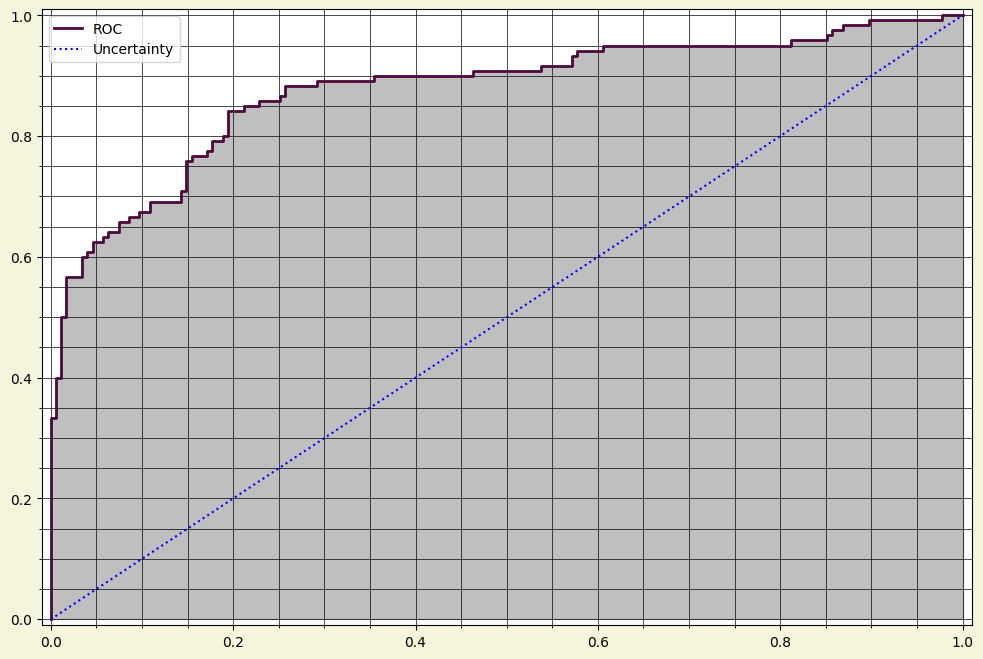

In [51]:
fig_roc = plt.figure(figsize=(12, 8))
roc_curve_ax = fig_roc.add_subplot()
fig_roc.set(facecolor='beige')
roc_curve_ax.set_xlim([-0.01, 1.01])
roc_curve_ax.set_ylim([-0.01, 1.01])

roc_curve_ax.grid(color='k',
               which='both',
               linewidth=0.5)

roc_curve_ax.minorticks_on()

roc_curve_ax.plot(confusion_matrix['fpr'], confusion_matrix['tpr'],
               color='#4d083c',
               linewidth=2,
               label='ROC')


roc_curve_ax.plot([0, 1], [0, 1],
               color='blue',
               linestyle=':',
               label='Uncertainty')


roc_curve_ax.fill_between(confusion_matrix['fpr'], confusion_matrix['tpr'],
                       color='gray',
                       alpha=0.5)


roc_curve_ax.legend()
plt.show()

<em>**(Прямая диагональная линия характеризует абсолютную неопределенность**  
**Ровно то же, что если бы мы случайно выбирали объект и метили его тем или иным классом**  
**Когда же кривая ниже диагональной, это говорит об обратной работе классификации. Проще говоря — нули мы называем единицами, а единицы нулями)**</em>

* ROC-кривая готова и вполне себе не неопределенная  
* Главный вопрос, который возникает при ее построении - "и чё она нам дает?"  
* Нам необходимо найти такой баланс между TPR и FPR, который нас будет устраивать при классификации  
* Баланс между TPR и FPR показывает сокровенный порог оценки. Он может вполне зависеть от веса того или иного Rate'а, но мы не будем это учитывать  

In [52]:
confusion_matrix.head()

,tp,tn,fp,fn,thr,tpr,fpr
0,120,0,175,0,0.000000,1.0,1.000000
1,120,1,174,0,0.040767,1.0,0.994286
2,120,2,173,0,0.050215,1.0,0.988571
3,120,3,172,0,0.063418,1.0,0.982857
4,120,4,171,0,0.063666,1.0,0.977143


In [53]:
confusion_matrix['tpr-fpr'] = confusion_matrix['tpr'] - confusion_matrix['fpr']

In [54]:
confusion_matrix.head()

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
0,120,0,175,0,0.000000,1.0,1.000000,0.000000
1,120,1,174,0,0.040767,1.0,0.994286,0.005714
2,120,2,173,0,0.050215,1.0,0.988571,0.011429
3,120,3,172,0,0.063418,1.0,0.982857,0.017143
4,120,4,171,0,0.063666,1.0,0.977143,0.022857


* Вычислим разницу TPR и FPR, при котором данная разница будет максимальна
* Определим точки на плоскости, которые определяют наилучший порог

In [55]:
max_rate_diff = confusion_matrix['tpr-fpr'].max()
max_thr = float(confusion_matrix.loc[confusion_matrix['tpr-fpr'] == max_rate_diff]['thr'])
max_tpr = float(confusion_matrix.loc[confusion_matrix['thr'] == max_thr]['tpr'])
max_fpr = float(confusion_matrix.loc[confusion_matrix['thr'] == max_thr]['fpr'])

In [56]:
max_thr, max_tpr, max_fpr

(0.3536805205415056, 0.8416666666666667, 0.19428571428571428)

Что мы видим на графике?  
Мы определили AUC (площадь под кривой), которая показывает нам более честную оценку, выбрав порог  
Но больше важно то, что эта метрика подходит для задач с дисбалансом классов, поскольку она учитывает всевозможные пороги для вычисления оценки

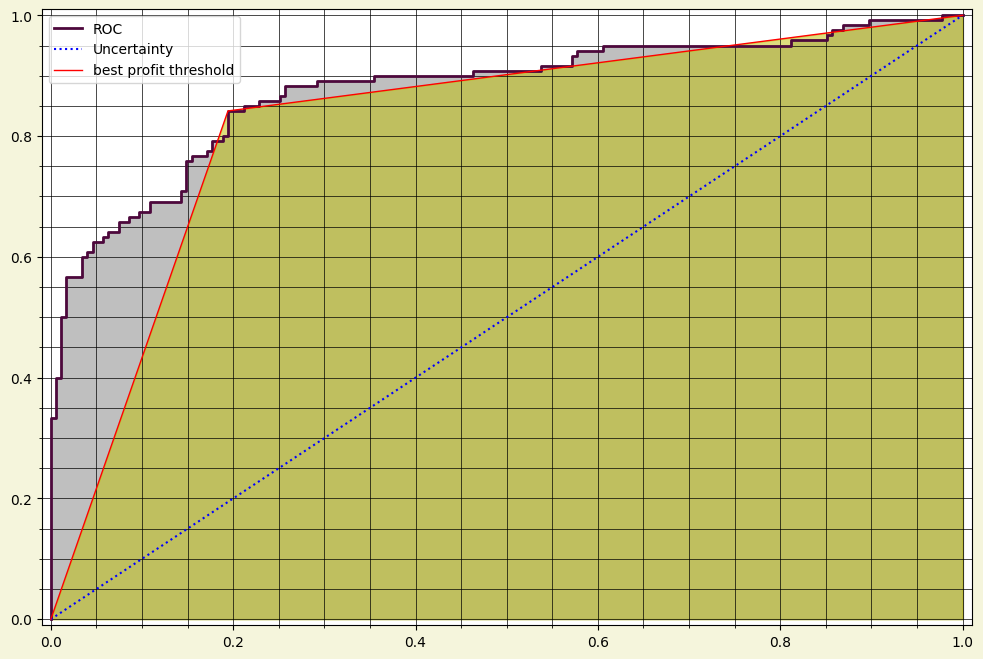

In [57]:
roc_curve_ax.plot([0, max_fpr, 1], [0, max_tpr, 1],
                  color='r',
                  linewidth=1,
                  label='best profit threshold')

roc_curve_ax.fill_between([0, max_fpr, 1], [0, max_tpr, 1],
                          color='y',
                          alpha=0.5)

roc_curve_ax.legend()

display(fig_roc)

Осталось проверить правильность наших вычислений, чтобы убедиться, что мы верно построили ROC-кривую  
Импортируем необходимое из sklearn, но для начала посчитаем оценку исходя из нашего графика

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
confusion_matrix.head()

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
0,120,0,175,0,0.000000,1.0,1.000000,0.000000
1,120,1,174,0,0.040767,1.0,0.994286,0.005714
2,120,2,173,0,0.050215,1.0,0.988571,0.011429
3,120,3,172,0,0.063418,1.0,0.982857,0.017143
4,120,4,171,0,0.063666,1.0,0.977143,0.022857


Подсчитаем площадь методом прямоугольников, вычислив площадь между соседними порогами  
Но так как у нас возникают и трапеции между соседними, то формула будет немного другой  
В конце всего просто просуммируем значения и получим полную площадь кривой

In [60]:
confusion_matrix['area'] = \
    np.abs(confusion_matrix['fpr'].diff()) * (confusion_matrix['tpr'] + confusion_matrix['tpr'].shift()) / 2
# S(трап.) = h*(a+b)/2

In [61]:
confusion_matrix.isna().sum()

tp         0
tn         0
fp         0
fn         0
thr        0
tpr        0
fpr        0
tpr-fpr    0
area       1
dtype: int64

In [62]:
confusion_matrix.fillna(0, inplace=True)

Вот мы и подсчитали оценку, теперь нам следует проверить ее со значением, которое выдает нам sklearn

In [63]:
confusion_matrix['area'].sum()

0.8773809523809524

Показатели совпадают до последнего знака

In [64]:
roc_auc_score(X_test['y_true'], X_test['y_score'])

0.8773809523809524

### Что в итоге?
* Мы вручную разобрали как работает ROC-кривая, как вычисляется AUC-ROC оценка
* Поняли, что данная оценка является очень удобной при бинарной классификации с неравными по размеру классами
* Научились определять порог, дающий честную оценку при классификации

(Еще хотелось бы добавить, что AUC-ROC считается устойчивой к огромному дисбалансу, однако сложно прийти к однозначному ответу и этот вопрос остается незакрытым. Преимущество AUC-ROC перед F1, на мой взгляд, в том, что она учитывает множество порогов, что делает ее мобильной в задачах, где нам важны коэффициенты при TPR и FPR)